Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3513 - loss: 1.7555 - val_accuracy: 0.5529 - val_loss: 1.2638
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5722 - loss: 1.1974 - val_accuracy: 0.6290 - val_loss: 1.0508
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6421 - loss: 1.0176 - val_accuracy: 0.6660 - val_loss: 0.9544
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6816 - loss: 0.9066 - val_accuracy: 0.6786 - val_loss: 0.9242
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7074 - loss: 0.8351 - val_accuracy: 0.6805 - val_loss: 0.9142
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7260 - loss: 0.7855 - val_accuracy: 0.7043 - val_loss: 0.8742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7432 - loss: 0.7267 - val_accuracy: 0.6911 - val_loss: 0.9005
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7539 -


Test accuracy: 0.70
Model saved to 'saved_model/my_cnn_model'


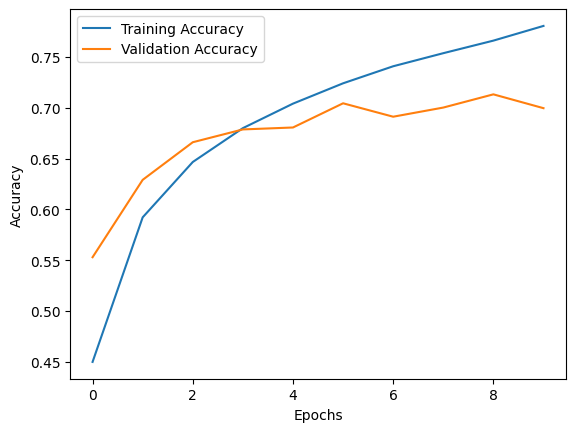

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Step 5: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Save the model for later use
model.save('saved_model/my_cnn_model.h5')
print("Model saved to 'saved_model/my_cnn_model'")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


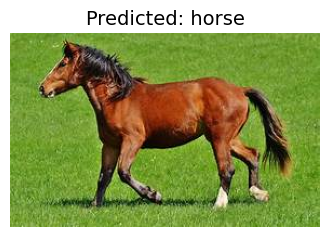

In [ ]:
# Step 6: Classify a custom image and display it
def preprocess_image(image_path):
    """
    Preprocesses the input image for prediction.
    Args:
        image_path (str): Path to the input image.
    Returns:
        np.array: Preprocessed image as a NumPy array.
    """
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def classify_and_show_image(image_path, model):
    """
    Classifies the input image and displays it with the predicted label.
    Args:
        image_path (str): Path to the input image.
        model (tf.keras.Model): Trained CNN model.
    """
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 class names
    # Preprocess the image
    image = preprocess_image(image_path)
    # Predict the class
    predictions = model.predict(image)
    predicted_class = class_names[np.argmax(predictions)]

    # Display the image with the predicted label
    plt.figure(figsize=(4, 4))
    original_image = load_img(image_path)  # Load the original image
    plt.imshow(original_image)
    plt.title(f"Predicted: {predicted_class}", fontsize=14)
    plt.axis('off')
    plt.show()

# Provide the path to your custom image
image_path = '/content/th (1).jpeg'  # Replace with the path to your image

# Load the saved model
loaded_model = tf.keras.models.load_model('saved_model/my_cnn_model.h5')

# Predict and display the image with its class
classify_and_show_image(image_path, loaded_model)
